In [1]:
import pandas as pd
#Loading the dataset

df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [2]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
#EDA stepsl. Show sleep disorder per age, sleep duration and MBI level. Find count of each  sleep
#Disorder per occupation, gender,Blood Pressure and BMI category


#Cleaning steps
#Remove person ID, 
# The BMI variable has four levels:
# "Normal", "Normal Weight", "Obese", and "Overweight".
# Change it so that "Normal Weight" turns to just "Normal"
#One hot encode it so that Normal gets a value of 1, Overweight gets a value of 2 and Obese gets 
# a value of 3
#One hot encode Gender, Occupation and Sleep Disorder
# Ordinal encode BMI category

#One hot encode the Sleep disorder variable.


In [5]:
#EDA 1
import pandas as pd

# Count of sleep disorder per occupation
occupation_counts = df.groupby('Occupation')['Sleep Disorder'].value_counts()

# Count of sleep disorder per gender
gender_counts = df.groupby('Gender')['Sleep Disorder'].value_counts()

# Count of sleep disorder per blood pressure
bp_counts = df.groupby('Blood Pressure')['Sleep Disorder'].value_counts()

# Count of sleep disorder per BMI category
bmi_counts = df.groupby('BMI Category')['Sleep Disorder'].value_counts()

In [6]:
occupation_counts

Occupation            Sleep Disorder
Accountant            None              30
                      Insomnia           7
Doctor                None              64
                      Sleep Apnea        4
                      Insomnia           3
Engineer              None              57
                      Insomnia           5
                      Sleep Apnea        1
Lawyer                None              42
                      Sleep Apnea        3
                      Insomnia           2
Manager               None               1
Nurse                 Sleep Apnea       61
                      None               9
                      Insomnia           3
Sales Representative  Sleep Apnea        2
Salesperson           Insomnia          29
                      None               2
                      Sleep Apnea        1
Scientist             None               2
                      Sleep Apnea        2
Software Engineer     None               3
                 

In [7]:
df['BMI Category'] = df['BMI Category'].str.replace('Normal Weight','Normal')
df['BMI Category'].value_counts()
df['BMI Category'] = df['BMI Category'].str.replace('Normal','1')  
df['BMI Category'] = df['BMI Category'].str.replace('Overweight','2')
df['BMI Category'] = df['BMI Category'].str.replace('Obese','3')
df['BMI Category'] = df['BMI Category'].astype(int)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    int64  
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(8), object(4)
memory usage: 38.1+ KB


In [9]:
df.drop(labels="Person ID",axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 35.2+ KB


In [10]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', 1, expand=True)


/tmp/ipykernel_282167/4022912196.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', 1, expand=True)


In [11]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,2,126/83,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,1,125/80,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,1,125/80,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,3,140/90,85,3000,Sleep Apnea,140,90


In [12]:
df.drop(labels="Blood Pressure",axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int64  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  Systolic                 374 non-null    object 
 12  Diastolic                374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


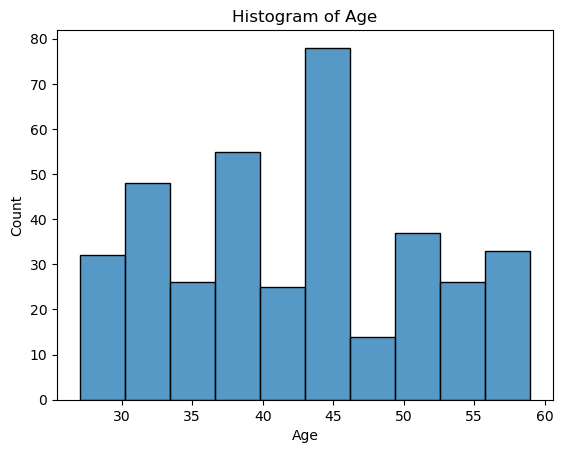

In [13]:
#EDA
import seaborn as sns
histAge=sns.histplot(data=df, x="Age").set(title="Histogram of Age")

[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

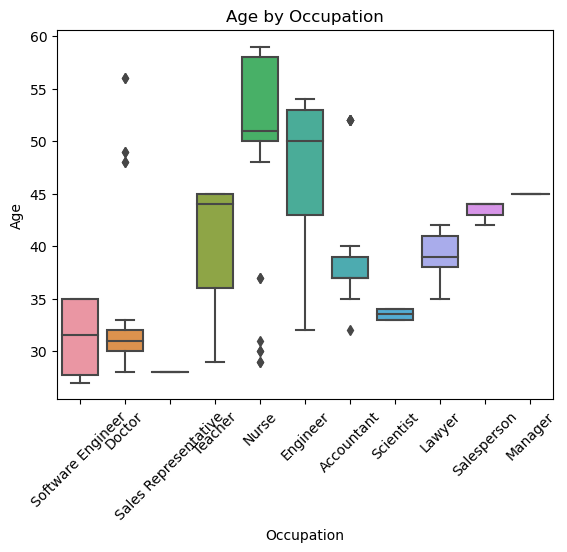

In [14]:
boxplot=sns.boxplot(data=df, x='Occupation', y='Age')
boxplot.set(title='Age by Occupation')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

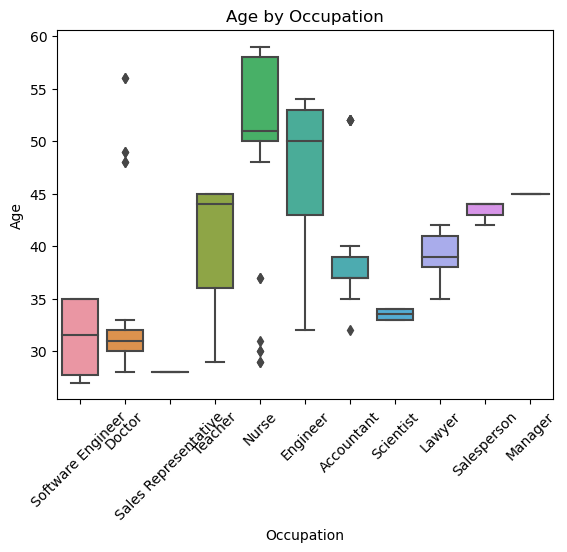

In [15]:
boxplot=sns.boxplot(data=df, x='Occupation', y='Age')
boxplot.set(title='Age by Occupation')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45)

/tmp/ipykernel_282167/1147567907.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


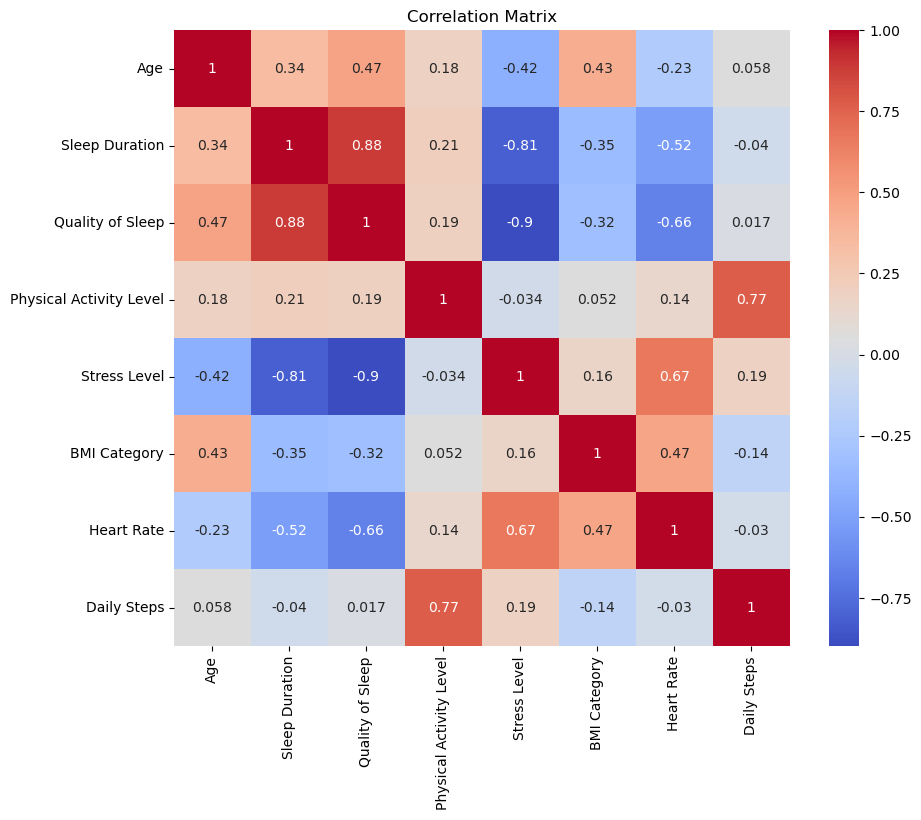

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# Replace 'df' with the actual variable name representing your dataframe

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title of the plot
plt.title('Correlation Matrix')

# Display the plot
plt.show()


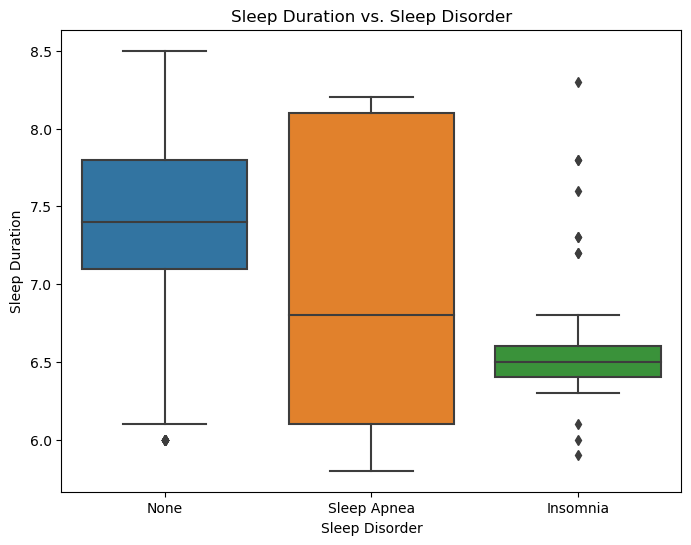

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# Replace 'df' with the actual variable name representing your dataframe

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df)

# Set the title and labels
plt.title('Sleep Duration vs. Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration')

# Display the plot
plt.show()


In [31]:
encoded_df = pd.get_dummies(df, columns=['Gender', 'Occupation'], drop_first=True)
encoded_df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,27,6.1,6,42,6,2,77,4200,None,126,...,0,0,0,0,0,0,0,0,1,0
1,28,6.2,6,60,8,1,75,10000,None,125,...,1,0,0,0,0,0,0,0,0,0
2,28,6.2,6,60,8,1,75,10000,None,125,...,1,0,0,0,0,0,0,0,0,0
3,28,5.9,4,30,8,3,85,3000,Sleep Apnea,140,...,0,0,0,0,0,1,0,0,0,0
4,28,5.9,4,30,8,3,85,3000,Sleep Apnea,140,...,0,0,0,0,0,1,0,0,0,0


In [53]:
y=encoded_df["Sleep Disorder"]
X=encoded_df.drop(labels="Sleep Disorder", axis=1)
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X=SS.fit_transform(X)

#One hot encoding y
y = pd.get_dummies(y, columns=['Sleep Disorder'], drop_first=False)
y.head()

,Insomnia,None,Sleep Apnea
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1


In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)



In [60]:
X_train.shape

(250, 21)

In [91]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[21]),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(3,activation="softmax"),
])



In [92]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
)
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

Epoch 1/100
1/1 [==============================] - 0s 102ms/step - loss: 0.7209 - val_loss: 0.7205
Epoch 2/100
1/1 [==============================] - 0s 73ms/step - loss: 0.6740 - val_loss: 0.7430
Epoch 3/100
1/1 [==============================] - 0s 72ms/step - loss: 0.5479 - val_loss: 0.7782
Epoch 4/100
1/1 [==============================] - 0s 81ms/step - loss: 0.4743 - val_loss: 0.8227
Epoch 5/100
1/1 [==============================] - 0s 78ms/step - loss: 0.3725 - val_loss: 0.8631
Epoch 6/100
1/1 [==============================] - 0s 85ms/step - loss: 0.3891 - val_loss: 0.8739


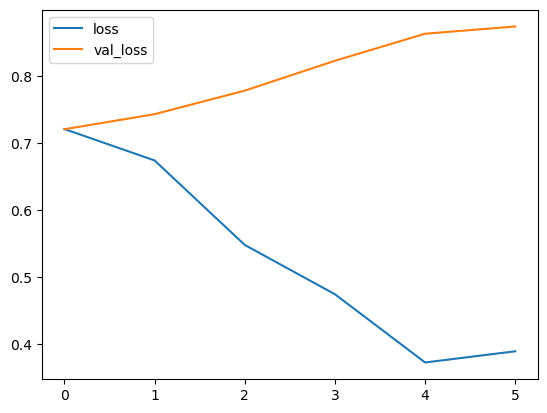

In [95]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=100,
    verbose=1,
    callbacks=[early_stopping],
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [94]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print(scores) 
#pred_test= model.predict(X_test)
#scores2 = model.evaluate(X_test, y_test, verbose=0)
#print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    


8/8 [==============================] - 0s 4ms/step
0.6608612537384033
